In [1]:
from modules.build_yolact import Yolact
from utils.augmentations import FastBaseTransform
from utils.functions import MovingAverage, ProgressBar
from utils import timer
from data.config import set_cfg
from utils.output_utils import NMS, after_nms, draw_img

In [2]:
import torch
import torch.backends.cudnn as cudnn
import argparse
import cv2
import os
import time
import glob

In [3]:
model_path = "/home/jupyter/Yolact_minimal/yolact_base_54_800000.pth"
name = "yolact_base_config"
set_cfg(name)

In [4]:
from datetime import datetime

In [41]:
start1 = datetime.now()
with torch.no_grad():
    cuda = torch.cuda.is_available()
    if cuda:
        cudnn.benchmark = True
        cudnn.fastest = True
        torch.set_default_tensor_type('torch.cuda.FloatTensor')
    
    net = Yolact()
    net.load_weights(model_path)
    net.eval()
    net = net.cuda()
    
    img_path="./input.jpg"
    img_origin = torch.from_numpy(cv2.imread(img_path)).cuda().float()
    img_h, img_w = img_origin.shape[0], img_origin.shape[1]
    img_trans = FastBaseTransform()(img_origin.unsqueeze(0))
    
    start = datetime.now()
    net_outs = net(img_trans)
    end = datetime.now() 
    
    nms_outs = NMS(net_outs, False)

    with timer.env('after nms'):
        results = after_nms(nms_outs, img_h, img_w, show_lincomb=False, crop_masks=False,
                                                            visual_thre=0.3, img_name="work")

        torch.cuda.synchronize()

    img_numpy = draw_img(results, img_origin)
end1= datetime.now()

In [39]:
print(end1-start1)

0:00:00.012854


In [30]:
import numpy as np

In [18]:
masks = results[3]
masks = masks.cpu().numpy()

In [32]:
image = cv2.imread(img_path)
image.shape

(480, 640, 3)

In [28]:
masks.shape[0]

10

In [33]:
image.fill(0)
n=masks.shape[0] 

for i in range(n):
    mask = masks[i,:,:]
    image[:,:,0] = np.where(mask==1,
                            (image[:,:,0] * 0) + 255,
                            image[:,:,0])
    image[:,:,1] = np.where(mask==1,
                            (image[:,:,1] * 0) + 255,
                            image[:,:,1])
    image[:,:,2] = np.where(mask==1,
                            (image[:,:,2] * 0) + 255,
                            image[:,:,2])

In [34]:
from matplotlib.pyplot import imshow
%matplotlib inline

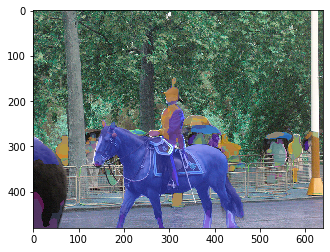

In [37]:
imshow(img_numpy)

In [18]:
img_path = "./imput.jpg"

In [ ]:
img_origin = torch.from_numpy(cv2.imread(one_img)).cuda().float()